In [135]:
import numpy as np
import pandas as pd
import sqlite3
import math
import mgrs
import matplotlib.pyplot as plt

In [193]:
def missingByCol(df): #count missing values by column
    for col in df.columns:
        if df[col].isna().sum() != 0:
            print(col, df[col].isna().sum())

Import Data: Need to copy and paste sqllite file from Kaggle into local drive path.         
FPA_FOD_20170508.sqlite https://www.kaggle.com/rtatman/188-million-us-wildfires                    

In [136]:
conn = sqlite3.connect('C:/Users/balso/Downloads/FPA_FOD_20170508.sqlite')
ca_fires = pd.read_sql_query('select * from fires where State = "CA";', conn) # only CA fires
ca_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189550 entries, 0 to 189549
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    189550 non-null  int64  
 1   FOD_ID                      189550 non-null  int64  
 2   FPA_ID                      189550 non-null  object 
 3   SOURCE_SYSTEM_TYPE          189550 non-null  object 
 4   SOURCE_SYSTEM               189550 non-null  object 
 5   NWCG_REPORTING_AGENCY       189550 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      189550 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    189550 non-null  object 
 8   SOURCE_REPORTING_UNIT       189550 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  189550 non-null  object 
 10  LOCAL_FIRE_REPORT_ID        61933 non-null   object 
 11  LOCAL_INCIDENT_ID           127983 non-null  object 
 12  FIRE_CODE                   55533 non-null   object 
 13  FIRE_NAME     

Exploratory Data Analysis (EDA)

In [137]:
ca_fires.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.895500e+05,1.895500e+05,189550.000000,1.895500e+05,189550.000000,189550.000000,9.190800e+04,91908.000000,189550.000000,189550.000000,189550.000000,189550.000000
mean,9.353992e+05,5.667452e+07,2003.118275,2.452884e+06,201.594571,5.690725,2.453347e+06,203.607727,67.242725,37.434167,-120.182292,10.767038
std,5.864817e+05,1.060565e+08,7.007634,2.554377e+03,65.936299,3.677568,2.563014e+03,65.127623,2029.960435,2.591567,2.155615,4.402412
min,1.000000e+00,1.000000e+00,1992.000000,2.448622e+06,1.000000,1.000000,2.448622e+06,1.000000,0.001000,32.537406,-124.402883,0.000000
25%,3.112172e+05,3.174202e+05,1997.000000,2.450624e+06,164.000000,2.000000,2.451362e+06,169.000000,0.100000,35.177688,-121.721944,6.000000
50%,1.096222e+06,1.335048e+06,2003.000000,2.452860e+06,202.000000,5.000000,2.453248e+06,206.000000,0.250000,37.565062,-120.530316,14.000000
75%,1.143609e+06,1.393693e+06,2009.000000,2.455034e+06,245.000000,9.000000,2.455763e+06,246.000000,1.000000,39.475208,-118.595503,14.000000
max,1.880465e+06,3.003484e+08,2015.000000,2.457388e+06,366.000000,13.000000,2.457388e+06,366.000000,315578.800000,42.051667,-114.125800,15.000000


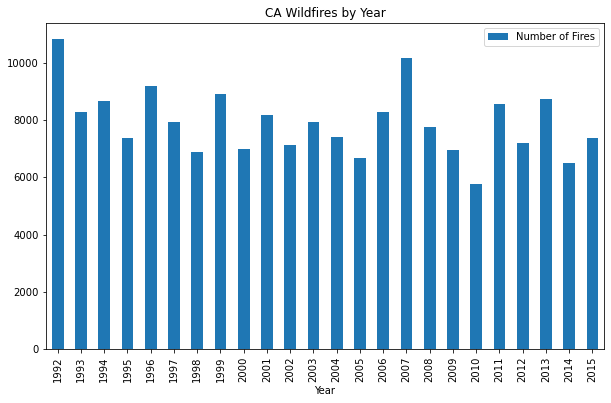

In [138]:
ca_fires_by_year = pd.DataFrame(ca_fires['FIRE_YEAR'].value_counts().reset_index(name='Number of Fires').sort_values(['index']))
ax = ca_fires_by_year.sort_values(['index']).plot.bar(x='index', y='Number of Fires', figsize = (10,6))
ax.set_title('CA Wildfires by Year')
plt.xlabel('Year')
plt.show()

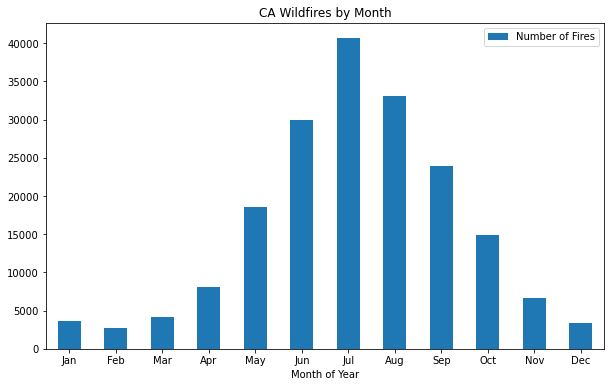

In [139]:
ca_fires_by_date = pd.to_datetime(ca_fires["DISCOVERY_DATE"], unit='D', origin='julian').value_counts().reset_index(name='Number of Fires').sort_values(['index'])
ca_fires_by_date.index = ca_fires_by_date['index']

ca_fires_by_month = ca_fires_by_date.groupby(by=[ca_fires_by_date.index.month]).sum()
ca_fires_by_month['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ca_fires_by_month

ax = ca_fires_by_month.plot.bar(x='Month', y='Number of Fires', figsize = (10,6), rot = 0)
ax.set_title('CA Wildfires by Month')
plt.xlabel('Month of Year')
plt.show()

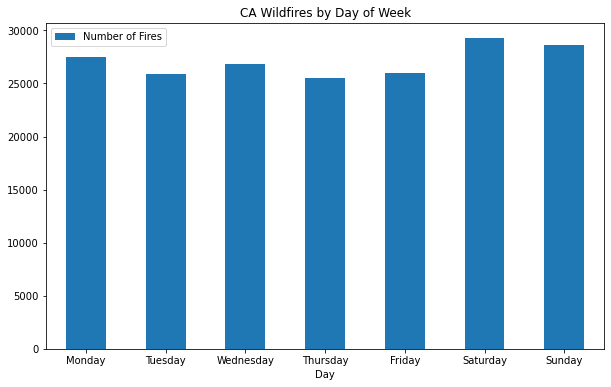

In [140]:
ca_fires_by_dayofweek = ca_fires_by_date.groupby(by=[ca_fires_by_date.index.dayofweek]).sum()
ca_fires_by_dayofweek['Day of Week'] = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ca_fires_by_dayofweek

ax = ca_fires_by_dayofweek.plot.bar(x = 'Day of Week', y='Number of Fires', figsize = (10,6), rot = 0)
ax.set_title('CA Wildfires by Day of Week')
plt.xlabel('Day')
plt.show()

  index  Number of Fires
0     A            98309
1     B            76942
2     C             9825
3     D             2137
4     E             1187
5     F              756
6     G              394


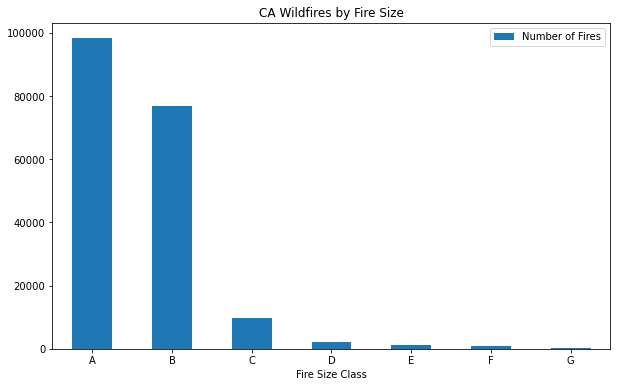

In [141]:
ca_fires_by_size = pd.DataFrame(ca_fires['FIRE_SIZE_CLASS'].value_counts().reset_index(name='Number of Fires').sort_values(['index']))
ca_fires_by_size

ax = ca_fires_by_size.sort_values(['index']).plot.bar(x='index', y='Number of Fires', figsize = (10,6), rot=0)
ax.set_title('CA Wildfires by Fire Size')
plt.xlabel('Fire Size Class')
print(ca_fires_by_size)
plt.show()
# A=greater than 0 but less than or equal to 0.25 acres
# B=0.26-9.9 acres
# C=10.0-99.9 acres
# D=100-299 acres
# E=300 to 999 acres
# F=1000 to 4999 acres
# G=5000+ acres

Create Fires Data Set:  Omitting weather data for now

In [142]:
m = mgrs.MGRS() #mgrs API
to_mgrs_1m = [] #precision 5
to_mgrs_10m = [] #precision 4
to_mgrs_100m = [] #precision 3
to_mgrs_1km = []  #precision 2
to_mgrs_10km = []  #precision 1
to_mgrs_100km = []  #precision 0
to_mgrs_lat_10km = []
to_mgrs_lon_10km = []
ca_fires_data = pd.DataFrame()

ca_fires_data['object_id'] = ca_fires['OBJECTID']
ca_fires_data['reporting_unit'] = ca_fires['NWCG_REPORTING_UNIT_NAME']
ca_fires_data['fire_date_num'] = ca_fires['DISCOVERY_DATE']
ca_fires_data['fire_date_cal'] = pd.to_datetime(ca_fires['DISCOVERY_DATE'], unit='D', origin='julian') #convert numeric to calendar date
ca_fires_data['fire_year'] = ca_fires['FIRE_YEAR']
ca_fires_data['fire_month'] = ca_fires_data['fire_date_cal'].dt.month_name()
ca_fires_data['fire_day_of_week'] = ca_fires_data['fire_date_cal'].dt.day_name()
ca_fires_data['fire_class'] = ca_fires['FIRE_SIZE_CLASS']
ca_fires_data['lat'] = ca_fires['LATITUDE']
ca_fires_data['lon'] = ca_fires['LONGITUDE']

for i, j in zip(ca_fires_data['lat'].tolist(), ca_fires_data['lon'].tolist()):
    to_mgrs_1m.append(m.toMGRS(i, j, MGRSPrecision=5)) # use mgrs API to convert lat/lon to MGRS conventions
    to_mgrs_10m.append(m.toMGRS(i, j, MGRSPrecision=4)) 
    to_mgrs_100m.append(m.toMGRS(i, j, MGRSPrecision=3)) 
    to_mgrs_1km.append(m.toMGRS(i, j, MGRSPrecision=2)) 
    to_mgrs_10km.append(m.toMGRS(i, j, MGRSPrecision=1)) 
    to_mgrs_100km.append(m.toMGRS(i, j, MGRSPrecision=0)) 

ca_fires_data['mgrs_1m'] = to_mgrs_1m
ca_fires_data['mgrs_10m'] = to_mgrs_10m
ca_fires_data['mgrs_100m'] = to_mgrs_100m
ca_fires_data['mgrs_1km'] = to_mgrs_1km
ca_fires_data['mgrs_10km'] = to_mgrs_10km
ca_fires_data['mgrs_100km'] = to_mgrs_100km

for k in ca_fires_data['mgrs_10km'].tolist():
    to_mgrs_lat_10km.append(m.toLatLon(k)[0])
    to_mgrs_lon_10km.append(m.toLatLon(k)[1])

ca_fires_data['mgrs_lat_10km'] = to_mgrs_lat_10km
ca_fires_data['mgrs_lon_10km'] = to_mgrs_lon_10km

# filter out winter months where fires not likely
months_used = ['April', 'May', 'June', 'July', 'August', 'September', 'October','November'] 
ca_fires_data = ca_fires_data[ca_fires_data.fire_month.isin(months_used)]

# filter out class A fires, which are less than 1/4 acre
classes_used = ['B','C','D','E','F','G']
ca_fires_data = ca_fires_data[ca_fires_data.fire_class.isin(classes_used)]

# filter out fires before 2000 since weather data is sparse before year 2000
ca_fires_data = ca_fires_data[ca_fires_data.fire_year >= 2000]

ca_fires_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53779 entries, 13 to 189548
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   object_id         53779 non-null  int64         
 1   reporting_unit    53779 non-null  object        
 2   fire_date_num     53779 non-null  float64       
 3   fire_date_cal     53779 non-null  datetime64[ns]
 4   fire_year         53779 non-null  int64         
 5   fire_month        53779 non-null  object        
 6   fire_day_of_week  53779 non-null  object        
 7   fire_class        53779 non-null  object        
 8   lat               53779 non-null  float64       
 9   lon               53779 non-null  float64       
 10  mgrs_1m           53779 non-null  object        
 11  mgrs_10m          53779 non-null  object        
 12  mgrs_100m         53779 non-null  object        
 13  mgrs_1km          53779 non-null  object        
 14  mgrs_10km         53

In [143]:
ca_fires_data.head(10)

,object_id,reporting_unit,fire_date_num,fire_date_cal,fire_year,fire_month,fire_day_of_week,fire_class,lat,lon,mgrs_1m,mgrs_10m,mgrs_100m,mgrs_1km,mgrs_10km,mgrs_100km,mgrs_lat_10km,mgrs_lon_10km
13,14,Eldorado National Forest,2453276.5,2004-09-28,2004,September,Tuesday,B,38.433333,-120.510000,10SGH1733856832,10SGH17335683,10SGH173568,10SGH1756,10SGH15,10SGH,38.373566,-120.596044
16,17,Eldorado National Forest,2453284.5,2004-10-06,2004,October,Wednesday,G,38.523333,-120.211667,10SGH4308067568,10SGH43086756,10SGH430675,10SGH4367,10SGH46,10SGH,38.456043,-120.249552
17,18,Eldorado National Forest,2453291.5,2004-10-13,2004,October,Wednesday,G,38.780000,-120.260000,10SGH3801495929,10SGH38019592,10SGH380959,10SGH3895,10SGH39,10SGH,38.728748,-120.354138
21,89,Angeles National Forest,2453554.5,2005-07-03,2005,July,Sunday,B,34.153889,-117.841111,11SMT2246479538,11SMT22467953,11SMT224795,11SMT2279,11SMT27,11SMT,34.067686,-117.866966
27,110,Cleveland National Forest,2453540.5,2005-06-19,2005,June,Sunday,C,33.718889,-117.433611,11SMT5982531072,11SMT59823107,11SMT598310,11SMT5931,11SMT53,11SMT,33.708802,-117.539594
29,133,Humboldt-Toiyabe National Forest,2453538.5,2005-06-17,2005,June,Friday,B,38.839722,-119.886389,11SKD4947602949,11SKD49470294,11SKD494029,11SKD4902,11SKD40,11SKD,38.810427,-119.994326
37,159,Humboldt-Toiyabe National Forest,2453573.5,2005-07-22,2005,July,Friday,B,38.294444,-119.540000,11SKC7787241537,11SKC77874153,11SKC778415,11SKC7741,11SKC74,11SKC,38.278621,-119.629433
42,171,Stanislaus National Forest,2453532.5,2005-06-11,2005,June,Saturday,B,37.940278,-120.121667,10SGH5294003096,10SGH52940309,10SGH529030,10SGH5203,10SGH50,10SGH,37.913213,-120.156170
44,178,Los Padres National Forest,2453544.5,2005-06-23,2005,June,Thursday,B,34.466667,-119.828333,11SKU4020817531,11SKU40201753,11SKU402175,11SKU4017,11SKU41,11SKU,34.398775,-119.828310
45,179,Los Padres National Forest,2453552.5,2005-07-01,2005,July,Friday,C,35.135833,-120.002500,10SGD7311692220,10SGD73119222,10SGD731922,10SGD7392,10SGD79,10SGD,35.116679,-120.037387


In [144]:
mgrs_100km = ['11SLT','11SMT','11SNT','11SPT','11SQT','11SMS','11SNS','11SPS','11SQS']
socal_fires_data = ca_fires_data[ca_fires_data.mgrs_100km.isin(mgrs_100km)]
# socal_fires_data.info()

In [145]:
socal_fires_data.head(10)

,object_id,reporting_unit,fire_date_num,fire_date_cal,fire_year,fire_month,fire_day_of_week,fire_class,lat,lon,mgrs_1m,mgrs_10m,mgrs_100m,mgrs_1km,mgrs_10km,mgrs_100km,mgrs_lat_10km,mgrs_lon_10km
21,89,Angeles National Forest,2453554.5,2005-07-03,2005,July,Sunday,B,34.153889,-117.841111,11SMT2246479538,11SMT22467953,11SMT224795,11SMT2279,11SMT27,11SMT,34.067686,-117.866966
27,110,Cleveland National Forest,2453540.5,2005-06-19,2005,June,Sunday,C,33.718889,-117.433611,11SMT5982531072,11SMT59823107,11SMT598310,11SMT5931,11SMT53,11SMT,33.708802,-117.539594
144,1282,Cleveland National Forest,2453582.5,2005-07-31,2005,July,Sunday,B,33.110833,-116.847222,11SNS1425463584,11SNS14256358,11SNS142635,11SNS1463,11SNS16,11SNS,33.078549,-116.892857
157,1336,Cleveland National Forest,2453555.5,2005-07-04,2005,July,Monday,B,32.833889,-116.730278,11SNS2524332904,11SNS25243290,11SNS252329,11SNS2532,11SNS23,11SNS,32.807799,-116.786366
158,1345,Cleveland National Forest,2453556.5,2005-07-05,2005,July,Tuesday,C,33.345000,-116.992778,11SNS0067289534,11SNS00678953,11SNS006895,11SNS0089,11SNS08,11SNS,33.258997,-117.000000
159,1347,Cleveland National Forest,2453472.5,2005-04-12,2005,April,Tuesday,B,33.322222,-116.965278,11SNS0323187009,11SNS03238700,11SNS032870,11SNS0387,11SNS08,11SNS,33.258997,-117.000000
161,1351,Cleveland National Forest,2453553.5,2005-07-02,2005,July,Saturday,B,33.325000,-116.961111,11SNS0361987318,11SNS03618731,11SNS036873,11SNS0387,11SNS08,11SNS,33.258997,-117.000000
162,1352,Cleveland National Forest,2453608.5,2005-08-26,2005,August,Friday,C,33.340278,-116.988056,11SNS0111189011,11SNS01118901,11SNS011890,11SNS0189,11SNS08,11SNS,33.258997,-117.000000
164,1357,Cleveland National Forest,2453565.5,2005-07-14,2005,July,Thursday,C,32.682778,-116.634167,11SNS3429616179,11SNS34291617,11SNS342161,11SNS3416,11SNS31,11SNS,32.627158,-116.680194
167,1371,Cleveland National Forest,2453573.5,2005-07-22,2005,July,Friday,B,32.770278,-116.458333,11SNS5073125950,11SNS50732595,11SNS507259,11SNS5025,11SNS52,11SNS,32.716638,-116.466461


In [146]:
# look at fire freq by chosen mgrs 100km block
ca_fires_by_mgrs = pd.DataFrame(socal_fires_data['mgrs_100km'].value_counts().reset_index(name='Number of Fires').sort_values(['Number of Fires'],ascending=False))
ca_fires_by_mgrs
# not many in the last 4, can drop these too

,index,Number of Fires
0,11SMT,3893
1,11SNT,1997
2,11SNS,1405
3,11SMS,447
4,11SLT,315
5,11SQS,104
6,11SQT,60
7,11SPT,43
8,11SPS,34


In [147]:
mgrs_100km = ['11SMT','11SNT','11SNS','11SMS','11SLT'] # redefine mgrs blocks
socal_fires_data = socal_fires_data[ca_fires_data.mgrs_100km.isin(mgrs_100km)]

ca_fires_by_mgrs = pd.DataFrame(socal_fires_data['mgrs_100km'].value_counts().reset_index(name='Number of Fires').sort_values(['Number of Fires'],ascending=False))
ca_fires_by_mgrs

<ipython-input-147-84c9ef478967>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  socal_fires_data = socal_fires_data[ca_fires_data.mgrs_100km.isin(mgrs_100km)]


,index,Number of Fires
0,11SMT,3893
1,11SNT,1997
2,11SNS,1405
3,11SMS,447
4,11SLT,315


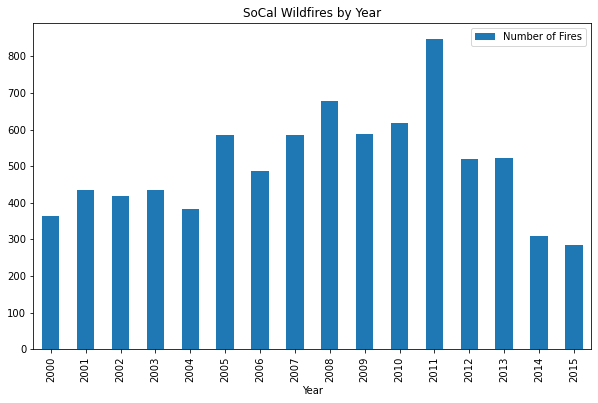

In [148]:
ca_fires_by_year = pd.DataFrame(socal_fires_data['fire_year'].value_counts().reset_index(name='Number of Fires').sort_values(['index']))
ax = ca_fires_by_year.sort_values(['index']).plot.bar(x='index', y='Number of Fires', figsize = (10,6))
ax.set_title('SoCal Wildfires by Year')
plt.xlabel('Year')
plt.show()

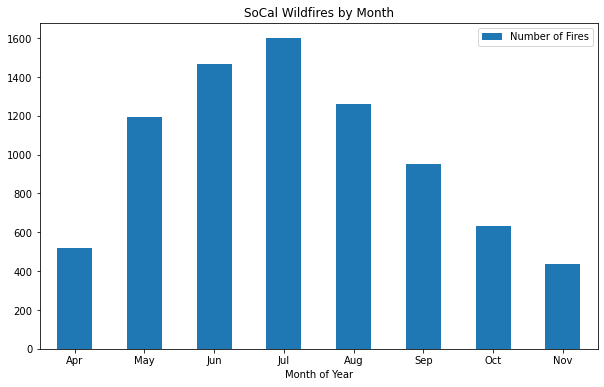

In [149]:
ca_fires_by_date = pd.to_datetime(socal_fires_data['fire_date_num'], unit='D', origin='julian').value_counts().reset_index(name='Number of Fires').sort_values(['index'])
ca_fires_by_date.index = ca_fires_by_date['index']

ca_fires_by_month = ca_fires_by_date.groupby(by=[ca_fires_by_date.index.month]).sum()
ca_fires_by_month['Month'] = ['Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
ca_fires_by_month

ax = ca_fires_by_month.plot.bar(x='Month', y='Number of Fires', figsize = (10,6), rot = 0)
ax.set_title('SoCal Wildfires by Month')
plt.xlabel('Month of Year')
plt.show()

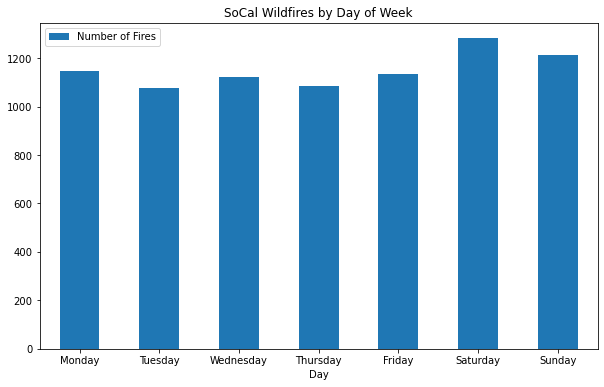

In [150]:
ca_fires_by_dayofweek = ca_fires_by_date.groupby(by=[ca_fires_by_date.index.dayofweek]).sum()
ca_fires_by_dayofweek['Day of Week'] = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ca_fires_by_dayofweek

ax = ca_fires_by_dayofweek.plot.bar(x = 'Day of Week', y='Number of Fires', figsize = (10,6), rot = 0)
ax.set_title('SoCal Wildfires by Day of Week')
plt.xlabel('Day')
plt.show()

In [151]:
socal_fires_data

,object_id,reporting_unit,fire_date_num,fire_date_cal,fire_year,fire_month,fire_day_of_week,fire_class,lat,lon,mgrs_1m,mgrs_10m,mgrs_100m,mgrs_1km,mgrs_10km,mgrs_100km,mgrs_lat_10km,mgrs_lon_10km
21,89,Angeles National Forest,2453554.5,2005-07-03,2005,July,Sunday,B,34.153889,-117.841111,11SMT2246479538,11SMT22467953,11SMT224795,11SMT2279,11SMT27,11SMT,34.067686,-117.866966
27,110,Cleveland National Forest,2453540.5,2005-06-19,2005,June,Sunday,C,33.718889,-117.433611,11SMT5982531072,11SMT59823107,11SMT598310,11SMT5931,11SMT53,11SMT,33.708802,-117.539594
144,1282,Cleveland National Forest,2453582.5,2005-07-31,2005,July,Sunday,B,33.110833,-116.847222,11SNS1425463584,11SNS14256358,11SNS142635,11SNS1463,11SNS16,11SNS,33.078549,-116.892857
157,1336,Cleveland National Forest,2453555.5,2005-07-04,2005,July,Monday,B,32.833889,-116.730278,11SNS2524332904,11SNS25243290,11SNS252329,11SNS2532,11SNS23,11SNS,32.807799,-116.786366
158,1345,Cleveland National Forest,2453556.5,2005-07-05,2005,July,Tuesday,C,33.345000,-116.992778,11SNS0067289534,11SNS00678953,11SNS006895,11SNS0089,11SNS08,11SNS,33.258997,-117.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189470,1880386,Monte Vista Unit,2457121.5,2015-04-09,2015,April,Thursday,B,32.723356,-116.891462,11SNS1017020624,11SNS10172062,11SNS101206,11SNS1020,11SNS12,11SNS,32.717728,-116.893290
189484,1880400,Riverside Unit,2454954.5,2009-05-03,2009,May,Sunday,C,33.892120,-117.079065,11SMT9268950197,11SMT92685019,11SMT926501,11SMT9250,11SMT95,11SMT,33.890318,-117.108147
189504,1880420,Monte Vista Unit,2455345.5,2010-05-29,2010,May,Saturday,C,32.906591,-116.942448,11SNS0538140933,11SNS05384093,11SNS053409,11SNS0540,11SNS04,11SNS,32.898187,-117.000000
189515,1880431,Monte Vista Unit,2456806.5,2014-05-29,2014,May,Thursday,B,32.950034,-116.965475,11SNS0322645748,11SNS03224574,11SNS032457,11SNS0345,11SNS04,11SNS,32.898187,-117.000000


In [152]:
socal_lite = pd.DataFrame()
# socal_lite['mgrs_100km'] = socal_fires_data['mgrs_100km']
socal_lite['mgrs_10km'] = socal_fires_data['mgrs_10km']
socal_lite['lat'] = socal_fires_data['mgrs_lat_10km']
socal_lite['lon'] = socal_fires_data['mgrs_lon_10km']
socal_lite['date'] = socal_fires_data['fire_date_cal']
socal_lite = socal_lite.groupby(level=0).first()
socal_lite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8057 entries, 21 to 189531
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   mgrs_10km  8057 non-null   object        
 1   lat        8057 non-null   float64       
 2   lon        8057 non-null   float64       
 3   date       8057 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 314.7+ KB


In [153]:
socal_lite.head()

,mgrs_10km,lat,lon,date
21,11SMT27,34.067686,-117.866966,2005-07-03
27,11SMT53,33.708802,-117.539594,2005-06-19
144,11SNS16,33.078549,-116.892857,2005-07-31
157,11SNS23,32.807799,-116.786366,2005-07-04
158,11SNS08,33.258997,-117.000000,2005-07-05


In [154]:
socal_lite.mgrs_10km.unique().shape

(332,)

In [155]:
def getCalTbl(start='2000-01-01', end='2015-12-31'):
    df = pd.DataFrame({'date': pd.date_range(start, end)})
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['month_name'] = df.date.dt.month_name()
    df['day'] = df.date.dt.day
    df['day_of_week'] = df.date.dt.dayofweek
    df['day_of_week_name'] = df.date.dt.day_name()
    # df["Week"] = df.date.dt.weekofyear
    # df["Quarter"] = df.date.dt.quarter
    # df["Year"] = df.date.dt.year
    # df["Year_half"] = (df.Quarter + 1) // 2
    return df

In [156]:
getCalTbl().head()

,date,year,month,month_name,day,day_of_week,day_of_week_name
0,2000-01-01,2000,1,January,1,5,Saturday
1,2000-01-02,2000,1,January,2,6,Sunday
2,2000-01-03,2000,1,January,3,0,Monday
3,2000-01-04,2000,1,January,4,1,Tuesday
4,2000-01-05,2000,1,January,5,2,Wednesday


In [157]:
cal_table = getCalTbl()
cal_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5844 non-null   datetime64[ns]
 1   year              5844 non-null   int64         
 2   month             5844 non-null   int64         
 3   month_name        5844 non-null   object        
 4   day               5844 non-null   int64         
 5   day_of_week       5844 non-null   int64         
 6   day_of_week_name  5844 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 319.7+ KB


In [158]:
cal_table = cal_table[cal_table.month_name.isin(months_used)]
cal_table['key'] = int(0)
cal_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 91 to 5812
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3904 non-null   datetime64[ns]
 1   year              3904 non-null   int64         
 2   month             3904 non-null   int64         
 3   month_name        3904 non-null   object        
 4   day               3904 non-null   int64         
 5   day_of_week       3904 non-null   int64         
 6   day_of_week_name  3904 non-null   object        
 7   key               3904 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 274.5+ KB


In [159]:
mgrs_100km = ['11SMT','11SNT','11SNS','11SMS','11SLT'] # redefine mgrs blocks

for i in mgrs_100km:
    print(m.toLatLon(i))

(33.43472882538433, -118.07576403857803)
(33.439394672509586, -117.0)
(32.53735523621132, -117.0)
(32.53284662620779, -118.06487986420537)
(33.42073849032219, -119.15103268615435)


In [160]:
mgrs_10km = []
for i in mgrs_100km:
    for j in range(10):
        for k in range(10):
            # print(str(m)+str(i)+str(j))
            # mgrs_10km.append(str(i)+str(j)+'0000'+str(k)+'0000')
            mgrs_10km.append(str(i)+str(j)+str(k))
len(mgrs_10km)

500

In [161]:
lat_10km = []
lon_10km = []
for i in mgrs_10km:
    lat_10km.append(m.toLatLon(i)[0])
    lon_10km.append(m.toLatLon(i)[1])
print(len(lat_10km), len(lon_10km))

500 500


In [162]:
mgrs_table = pd.DataFrame()
mgrs_table['mgrs_10km'] = mgrs_10km
mgrs_table['lat_10km'] = lat_10km
mgrs_table['lon_10km'] = lon_10km
mgrs_table['key'] = int(0)
mgrs_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mgrs_10km  500 non-null    object 
 1   lat_10km   500 non-null    float64
 2   lon_10km   500 non-null    float64
 3   key        500 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [163]:
mgrs_table.head()

,mgrs_10km,lat_10km,lon_10km,key
0,11SMT00,33.434729,-118.075764,0
1,11SMT01,33.524910,-118.076879,0
2,11SMT02,33.615089,-118.078000,0
3,11SMT03,33.705267,-118.079125,0
4,11SMT04,33.795444,-118.080255,0


In [164]:
mgrs_table.to_csv('mgrs_table.csv', index=False)

In [165]:
cal_table.head()

,date,year,month,month_name,day,day_of_week,day_of_week_name,key
91,2000-04-01,2000,4,April,1,5,Saturday,0
92,2000-04-02,2000,4,April,2,6,Sunday,0
93,2000-04-03,2000,4,April,3,0,Monday,0
94,2000-04-04,2000,4,April,4,1,Tuesday,0
95,2000-04-05,2000,4,April,5,2,Wednesday,0


In [166]:
mgrs_cal_table = mgrs_table.merge(cal_table, on = 'key')
mgrs_cal_table

,mgrs_10km,lat_10km,lon_10km,key,date,year,month,month_name,day,day_of_week,day_of_week_name
0,11SMT00,33.434729,-118.075764,0,2000-04-01,2000,4,April,1,5,Saturday
1,11SMT00,33.434729,-118.075764,0,2000-04-02,2000,4,April,2,6,Sunday
2,11SMT00,33.434729,-118.075764,0,2000-04-03,2000,4,April,3,0,Monday
3,11SMT00,33.434729,-118.075764,0,2000-04-04,2000,4,April,4,1,Tuesday
4,11SMT00,33.434729,-118.075764,0,2000-04-05,2000,4,April,5,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
1951995,11SLT99,34.245298,-118.194561,0,2015-11-26,2015,11,November,26,3,Thursday
1951996,11SLT99,34.245298,-118.194561,0,2015-11-27,2015,11,November,27,4,Friday
1951997,11SLT99,34.245298,-118.194561,0,2015-11-28,2015,11,November,28,5,Saturday
1951998,11SLT99,34.245298,-118.194561,0,2015-11-29,2015,11,November,29,6,Sunday


In [167]:
socal_lite

,mgrs_10km,lat,lon,date
21,11SMT27,34.067686,-117.866966,2005-07-03
27,11SMT53,33.708802,-117.539594,2005-06-19
144,11SNS16,33.078549,-116.892857,2005-07-31
157,11SNS23,32.807799,-116.786366,2005-07-04
158,11SNS08,33.258997,-117.000000,2005-07-05
...,...,...,...,...
189470,11SNS12,32.717728,-116.893290,2015-04-09
189484,11SMT95,33.890318,-117.108147,2009-05-03
189504,11SNS04,32.898187,-117.000000,2010-05-29
189515,11SNS04,32.898187,-117.000000,2014-05-29


In [168]:
fires_mgrs_cal_table = mgrs_cal_table.merge(socal_lite, on = ('mgrs_10km','date'), how = 'left')
fires_mgrs_cal_table

,mgrs_10km,lat_10km,lon_10km,key,date,year,month,month_name,day,day_of_week,day_of_week_name,lat,lon
0,11SMT00,33.434729,-118.075764,0,2000-04-01,2000,4,April,1,5,Saturday,NaN,NaN
1,11SMT00,33.434729,-118.075764,0,2000-04-02,2000,4,April,2,6,Sunday,NaN,NaN
2,11SMT00,33.434729,-118.075764,0,2000-04-03,2000,4,April,3,0,Monday,NaN,NaN
3,11SMT00,33.434729,-118.075764,0,2000-04-04,2000,4,April,4,1,Tuesday,NaN,NaN
4,11SMT00,33.434729,-118.075764,0,2000-04-05,2000,4,April,5,2,Wednesday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952408,11SLT99,34.245298,-118.194561,0,2015-11-26,2015,11,November,26,3,Thursday,NaN,NaN
1952409,11SLT99,34.245298,-118.194561,0,2015-11-27,2015,11,November,27,4,Friday,NaN,NaN
1952410,11SLT99,34.245298,-118.194561,0,2015-11-28,2015,11,November,28,5,Saturday,NaN,NaN
1952411,11SLT99,34.245298,-118.194561,0,2015-11-29,2015,11,November,29,6,Sunday,NaN,NaN


In [169]:
fires_mgrs_cal_table.drop(['key','year','month','day','day_of_week','lon'], axis = 1, inplace = True)
fires_mgrs_cal_table

,mgrs_10km,lat_10km,lon_10km,date,month_name,day_of_week_name,lat
0,11SMT00,33.434729,-118.075764,2000-04-01,April,Saturday,NaN
1,11SMT00,33.434729,-118.075764,2000-04-02,April,Sunday,NaN
2,11SMT00,33.434729,-118.075764,2000-04-03,April,Monday,NaN
3,11SMT00,33.434729,-118.075764,2000-04-04,April,Tuesday,NaN
4,11SMT00,33.434729,-118.075764,2000-04-05,April,Wednesday,NaN
...,...,...,...,...,...,...,...
1952408,11SLT99,34.245298,-118.194561,2015-11-26,November,Thursday,NaN
1952409,11SLT99,34.245298,-118.194561,2015-11-27,November,Friday,NaN
1952410,11SLT99,34.245298,-118.194561,2015-11-28,November,Saturday,NaN
1952411,11SLT99,34.245298,-118.194561,2015-11-29,November,Sunday,NaN


In [170]:
fires_mgrs_cal_table['is_fire_bool'] = ~fires_mgrs_cal_table['lat'].isna()
# fires_mgrs_cal_table
is_fire = []
for i in fires_mgrs_cal_table['is_fire_bool']:
    if i == False:
        is_fire.append(int(0))
    else:
        is_fire.append(int(1))

fires_mgrs_cal_table['is_fire'] = is_fire
fires_mgrs_cal_table.drop(['lat','is_fire_bool'], axis = 1, inplace = True)
fires_mgrs_cal_table

,mgrs_10km,lat_10km,lon_10km,date,month_name,day_of_week_name,is_fire
0,11SMT00,33.434729,-118.075764,2000-04-01,April,Saturday,0
1,11SMT00,33.434729,-118.075764,2000-04-02,April,Sunday,0
2,11SMT00,33.434729,-118.075764,2000-04-03,April,Monday,0
3,11SMT00,33.434729,-118.075764,2000-04-04,April,Tuesday,0
4,11SMT00,33.434729,-118.075764,2000-04-05,April,Wednesday,0
...,...,...,...,...,...,...,...
1952408,11SLT99,34.245298,-118.194561,2015-11-26,November,Thursday,0
1952409,11SLT99,34.245298,-118.194561,2015-11-27,November,Friday,0
1952410,11SLT99,34.245298,-118.194561,2015-11-28,November,Saturday,0
1952411,11SLT99,34.245298,-118.194561,2015-11-29,November,Sunday,0


In [171]:
fires_mgrs_cal_table = fires_mgrs_cal_table.drop_duplicates()

In [172]:
fires_mgrs_cal_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952000 entries, 0 to 1952412
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   mgrs_10km         object        
 1   lat_10km          float64       
 2   lon_10km          float64       
 3   date              datetime64[ns]
 4   month_name        object        
 5   day_of_week_name  object        
 6   is_fire           int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 119.1+ MB


In [173]:
fires_mgrs_cal_table[fires_mgrs_cal_table['is_fire'] == 1]

,mgrs_10km,lat_10km,lon_10km,date,month_name,day_of_week_name,is_fire
15102,11SMT03,33.705267,-118.079125,2013-11-05,November,Tuesday,1
18392,11SMT04,33.795444,-118.080255,2011-07-02,July,Saturday,1
19072,11SMT04,33.795444,-118.080255,2014-05-11,May,Sunday,1
22285,11SMT05,33.885620,-118.081391,2011-06-21,June,Tuesday,1
22300,11SMT05,33.885620,-118.081391,2011-07-06,July,Wednesday,1
...,...,...,...,...,...,...,...
1949427,11SLT99,34.245298,-118.194561,2003-10-04,October,Saturday,1
1949771,11SLT99,34.245298,-118.194561,2005-05-13,May,Friday,1
1950043,11SLT99,34.245298,-118.194561,2006-06-10,June,Saturday,1
1950059,11SLT99,34.245298,-118.194561,2006-06-26,June,Monday,1


In [174]:
lat = 33.2354 
lon =-117.2322

m.toMGRS(lat, lon, MGRSPrecision=1)

'11SMS77'

ELSINORE, CA US	                33.686	-117.3458   11SMT62 MT  
HEMET, CA US	                33.7381	-116.8939   11SNT03 NT    
JULIAN CALIFORNIA, CA US        33.0758	-116.5908   11SNS35 NS  
LOS ANGELES DOWNTOWN USC, CA US	34.0236	-118.2911   11SLT86 LT  
VISTA, CA US	                33.2354	-117.2322   11SMS77 MS  

Get Weather Data

In [175]:
usgs_weather = pd.read_csv('usgs_weather.csv')
usgs_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,FMTM,MDPR,...,WT02,WT05,WT07,WT08,WT09,WT11,WT13,WT16,WT18,WT19
0,USC00043896,"HEMET, CA US",33.7381,-116.8939,552.0,1/1/2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00043896,"HEMET, CA US",33.7381,-116.8939,552.0,1/2/2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00043896,"HEMET, CA US",33.7381,-116.8939,552.0,1/3/2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00043896,"HEMET, CA US",33.7381,-116.8939,552.0,1/4/2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00043896,"HEMET, CA US",33.7381,-116.8939,552.0,1/5/2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
usgs_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38315 entries, 0 to 38314
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    38315 non-null  object 
 1   NAME       38315 non-null  object 
 2   LATITUDE   38315 non-null  float64
 3   LONGITUDE  38315 non-null  float64
 4   ELEVATION  38315 non-null  float64
 5   DATE       38315 non-null  object 
 6   AWND       7741 non-null   float64
 7   DAPR       7 non-null      float64
 8   FMTM       4324 non-null   float64
 9   MDPR       39 non-null     float64
 10  PGTM       4143 non-null   float64
 11  PRCP       30267 non-null  float64
 12  SNOW       13183 non-null  float64
 13  SNWD       13055 non-null  float64
 14  TAVG       9799 non-null   float64
 15  TMAX       36700 non-null  float64
 16  TMIN       36704 non-null  float64
 17  TOBS       16756 non-null  float64
 18  TSUN       1077 non-null   float64
 19  WDF2       7736 non-null   float64
 20  WDF5  

In [177]:
usgs_weather.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,DAPR,FMTM,MDPR,PGTM,PRCP,SNOW,...,WT02,WT05,WT07,WT08,WT09,WT11,WT13,WT16,WT18,WT19
count,38315.000000,38315.000000,38315.000000,7741.000000,7.000000,4324.000000,39.000000,4143.000000,30267.000000,13183.000000,...,171.0,108.0,462.0,3907.0,20.0,1.0,1857.0,642.0,1.0,1.0
mean,33.551297,-117.270941,485.244912,1.839085,6.000000,1628.384598,0.287179,1460.594738,0.032339,0.003891,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.348738,0.578949,444.591825,1.042533,10.148892,1098.644090,0.445633,269.443445,0.182989,0.243048,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN
min,33.075800,-118.291100,54.600000,0.000000,2.000000,0.000000,0.010000,2.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,33.235400,-117.345800,131.100000,1.120000,2.000000,1408.750000,0.035000,1345.500000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,33.686000,-117.232200,386.500000,1.790000,2.000000,1518.000000,0.100000,1455.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,33.738100,-116.893900,552.000000,2.240000,2.500000,1616.000000,0.360000,1558.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,34.023600,-116.590800,1292.400000,11.180000,29.000000,9999.000000,2.000000,2359.000000,7.500000,16.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [178]:
prcp_temp = pd.DataFrame()
prcp_temp['date'] = pd.to_datetime(usgs_weather['DATE'])
prcp_temp['lat'] = usgs_weather['LATITUDE']
prcp_temp['lon'] = usgs_weather['LONGITUDE']
# prcp_temp['elevation'] = usgs_weather['ELEVATION']
prcp_temp['prcp'] = usgs_weather['PRCP']
prcp_temp['tmax'] = usgs_weather['TMAX']
prcp_temp['tmin'] = usgs_weather['TMIN']
prcp_temp['tobs'] = usgs_weather['TOBS']
# prcp_temp['key'] = int(0)
prcp_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38315 entries, 0 to 38314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    38315 non-null  datetime64[ns]
 1   lat     38315 non-null  float64       
 2   lon     38315 non-null  float64       
 3   prcp    30267 non-null  float64       
 4   tmax    36700 non-null  float64       
 5   tmin    36704 non-null  float64       
 6   tobs    16756 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.0 MB


In [179]:
to_mgrs_10km, to_mgrs_100km = [],[]
for i, j in zip(prcp_temp['lat'].tolist(), prcp_temp['lon'].tolist()):
    # to_mgrs_1m.append(m.toMGRS(i, j, MGRSPrecision=5)) # use mgrs API to convert lat/lon to MGRS conventions
    # to_mgrs_10m.append(m.toMGRS(i, j, MGRSPrecision=4)) 
    # to_mgrs_100m.append(m.toMGRS(i, j, MGRSPrecision=3)) 
    # to_mgrs_1km.append(m.toMGRS(i, j, MGRSPrecision=2)) 
    to_mgrs_10km.append(m.toMGRS(i, j, MGRSPrecision=1)) 
    to_mgrs_100km.append(m.toMGRS(i, j, MGRSPrecision=0)) 

In [180]:
# to_mgrs_100km[:5]
prcp_temp['mgrs_100km'] = to_mgrs_100km
prcp_temp['mgrs_10km'] = to_mgrs_10km

In [181]:
prcp_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38315 entries, 0 to 38314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        38315 non-null  datetime64[ns]
 1   lat         38315 non-null  float64       
 2   lon         38315 non-null  float64       
 3   prcp        30267 non-null  float64       
 4   tmax        36700 non-null  float64       
 5   tmin        36704 non-null  float64       
 6   tobs        16756 non-null  float64       
 7   mgrs_100km  38315 non-null  object        
 8   mgrs_10km   38315 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.6+ MB


In [182]:
prcp_temp.head()

,date,lat,lon,prcp,tmax,tmin,tobs,mgrs_100km,mgrs_10km
0,2000-01-01,33.7381,-116.8939,0.41,NaN,NaN,NaN,11SNT,11SNT03
1,2000-01-02,33.7381,-116.8939,0.00,NaN,NaN,NaN,11SNT,11SNT03
2,2000-01-03,33.7381,-116.8939,0.00,68.0,25.0,65.0,11SNT,11SNT03
3,2000-01-04,33.7381,-116.8939,0.00,72.0,29.0,70.0,11SNT,11SNT03
4,2000-01-05,33.7381,-116.8939,0.00,75.0,29.0,71.0,11SNT,11SNT03


Merge in Weather Data

In [183]:
fires_mgrs_cal_table.head()

,mgrs_10km,lat_10km,lon_10km,date,month_name,day_of_week_name,is_fire
0,11SMT00,33.434729,-118.075764,2000-04-01,April,Saturday,0
1,11SMT00,33.434729,-118.075764,2000-04-02,April,Sunday,0
2,11SMT00,33.434729,-118.075764,2000-04-03,April,Monday,0
3,11SMT00,33.434729,-118.075764,2000-04-04,April,Tuesday,0
4,11SMT00,33.434729,-118.075764,2000-04-05,April,Wednesday,0


In [184]:
fires_mgrs_cal_table['mgrs_10km'].str.slice(stop = 5)

0          11SMT
1          11SMT
2          11SMT
3          11SMT
4          11SMT
           ...  
1952408    11SLT
1952409    11SLT
1952410    11SLT
1952411    11SLT
1952412    11SLT
Name: mgrs_10km, Length: 1952000, dtype: object

In [195]:
data = pd.DataFrame()
data['mgrs_100km'] = fires_mgrs_cal_table['mgrs_10km'].str.slice(stop = 5) #truncate to get one level higher on grid
data['mgrs_10km'] = fires_mgrs_cal_table['mgrs_10km']
data['lat_10km'] = fires_mgrs_cal_table['lat_10km']
data['lon_10km'] = fires_mgrs_cal_table['lon_10km']
data['date'] = fires_mgrs_cal_table['date']
data['day_of_year'] = fires_mgrs_cal_table['date'].dt.dayofyear
data['month_name'] = fires_mgrs_cal_table['month_name']
data['day_of_week_name'] = fires_mgrs_cal_table['day_of_week_name']
data['is_fire'] = fires_mgrs_cal_table['is_fire']
data.head()

,mgrs_100km,mgrs_10km,lat_10km,lon_10km,date,day_of_year,month_name,day_of_week_name,is_fire
0,11SMT,11SMT00,33.434729,-118.075764,2000-04-01,92,April,Saturday,0
1,11SMT,11SMT00,33.434729,-118.075764,2000-04-02,93,April,Sunday,0
2,11SMT,11SMT00,33.434729,-118.075764,2000-04-03,94,April,Monday,0
3,11SMT,11SMT00,33.434729,-118.075764,2000-04-04,95,April,Tuesday,0
4,11SMT,11SMT00,33.434729,-118.075764,2000-04-05,96,April,Wednesday,0


In [196]:
# merge data
data = pd.merge(data, prcp_temp, on = ('date','mgrs_100km'), how = 'left')
# rearrange data
data = data[['mgrs_100km','mgrs_10km_x','lat_10km','lon_10km','date','day_of_year','month_name','day_of_week_name','lat','lon','prcp','tmax','tmin','tobs','is_fire']]
# rename columns
# data.rename(columns = {'mgrs_10km_x': 'mgrs_10km', 'lat': 'weather_lat', 'lon': 'weather_lon'})
data.columns = ['mgrs_100km','mgrs_10km','lat_10km','lon_10km','date','day_of_year','month_name','day_of_week_name','weather_lat','weather_lon','prcp','tmax','tmin','tobs','is_fire']
data.head()

,mgrs_100km,mgrs_10km,lat_10km,lon_10km,date,day_of_year,month_name,day_of_week_name,weather_lat,weather_lon,prcp,tmax,tmin,tobs,is_fire
0,11SMT,11SMT00,33.434729,-118.075764,2000-04-01,92,April,Saturday,33.686,-117.3458,0.0,78.0,49.0,78.0,0
1,11SMT,11SMT00,33.434729,-118.075764,2000-04-02,93,April,Sunday,33.686,-117.3458,0.0,85.0,42.0,82.0,0
2,11SMT,11SMT00,33.434729,-118.075764,2000-04-03,94,April,Monday,33.686,-117.3458,0.0,86.0,46.0,83.0,0
3,11SMT,11SMT00,33.434729,-118.075764,2000-04-04,95,April,Tuesday,33.686,-117.3458,0.0,89.0,49.0,87.0,0
4,11SMT,11SMT00,33.434729,-118.075764,2000-04-05,96,April,Wednesday,33.686,-117.3458,0.0,89.0,49.0,79.0,0


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952000 entries, 0 to 1951999
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   mgrs_100km        object        
 1   mgrs_10km         object        
 2   lat_10km          float64       
 3   lon_10km          float64       
 4   date              datetime64[ns]
 5   day_of_year       int64         
 6   month_name        object        
 7   day_of_week_name  object        
 8   weather_lat       float64       
 9   weather_lon       float64       
 10  prcp              float64       
 11  tmax              float64       
 12  tmin              float64       
 13  tobs              float64       
 14  is_fire           int64         
dtypes: datetime64[ns](1), float64(8), int64(2), object(4)
memory usage: 238.3+ MB


In [198]:
missingByCol(data)

weather_lat 31800
weather_lon 31800
prcp 437700
tmax 128300
tmin 126300
tobs 986400
